# Unsupervised machine learning exercise

## Objective of the analysis

This exercise is based on an attempt to explain the results of the Spanish Congress result for the Spanish elections (June 2016) according to a variety of factors such as unemployment percent vs age and sector of activity, age, place of birth or living, gender and other data of the region.

In order to do so,  I am taking the following dataset downloaded from Kaggle (check https://www.kaggle.com/datasets/mlprojectbth/spanish-region-and-election-results)

The objective of this analysis is to clustere the data, in order to have a visual idea of hidden structures within the data which may explain the vote intention in Spain. 
In order to do this, I will drop the "outcome" variable from the dataset. Then, ideally, the generated clusters should correspond to the extracted outcome variables.

As a first step, let's import our data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

data = pd.read_csv('spanishregions_dataset.csv', sep=';')
data.head(5)

,Code,RegionName,Population,TotalCensus,TotalVotes,AbstentionPtge,BlankVotesPtge,NullVotesPtge,PP_Ptge,PSOE_Ptge,...,Unemploy25_40_Ptge,UnemployMore40_Ptge,UnemployLess25_population_Ptge,Unemploy25_40_population_Ptge,UnemployMore40_population_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,NotJobBeforeUnemploymentPtge
0,1001,Alegría-Dulantzi,2882,1979,1339,32.340,0.523,1.568,11.949,15.310,...,55.676,37.838,0.416,3.574,2.429,2.703,12.432,6.486,63.243,15.135
1,1002,Amurrio,10263,8124,5722,29.567,0.542,1.188,8.668,10.346,...,46.308,48.811,0.380,3.605,3.800,3.755,14.268,10.638,56.571,14.768
2,1003,Aramaio,1518,1190,782,34.286,0.256,1.023,1.662,1.535,...,56.000,44.000,0.000,0.922,0.725,0.000,32.000,8.000,60.000,0.000
3,1004,Artziniega,1829,1399,1008,27.949,0.794,1.290,12.897,7.044,...,41.509,56.604,0.109,2.406,3.280,3.774,16.038,3.774,66.038,10.377
4,1006,Armiñón,244,175,140,20.000,0.000,0.000,25.714,12.857,...,33.333,66.667,0.000,1.639,3.279,16.667,8.333,16.667,58.333,0.000



### Detailed Analysis of the dataset

Here follows a brief description of each of the columns, grouped by "Type of variable".

#### Specific Data of the region (observation).
1) Code [String]
2) RegionName [String]
3) Population [Int]
4) TotalCensus [Int]: Number of people that can effectively vote.
5) TotalVotes [Int]

### Distribution of the votes (this is the feature that we will most likely be analyzing).
6) AbstentionPtge [Float]: Percent of the people that have not votes in the election.
7) BlankVotesPtge [Float]: Percent of votes that were blank. 
8) NullVotesPtge [Float]: Percent of votes that were null. 
9) PPPtge [Float]: Percent of the votes given to the political party called “Partido Popular”. 
10) PSOEPtge [Float]: Percent of the votes given to the political party called “Partido Socialista Obrero Español”
11) PodemosPtge [Float]: Percent of the votes given to the political party called “Podemos”
12) CiudadanosPtge [Float]: Percent of the votes given to the political party called “Ciudadanos” 
13) Others_Ptge [Float]: Percent of the votes given to the others political parties

#### Distribution of the votes across the electors' age range:
14) Age0-4Ptge [Float]: Percent of the populations which age is between 0 and 4 years old.

15)-34) (Similar to the previous one, using ranges of 5 years all the way through up to 100+ years of age)

#### Gender distribution:
35) ManPopulationPtge [Float]
36) WomanPopulationPtge [Float]

#### Nativity distribution:
37) SpanishPtge [Float]: Percentage of people with spanish nationality in a region
38) ForeignersPtge [Float]: Percentage of foreign people in a region. 

#### Place of living distribution:
39) SameComAutonPtge [Float]: Percentage of people who live in the same autonomic community (same province) that was born.
40) SameComAutonDiffProvPtge [Float]: Percentage of people who live in the same autonomic community (different province) that was born.
41) DifComAutonPtge [Float]: Percentage of people who live in different autonomic community that was born.

#### Rate of unemployment distribution per range of age:
42) UnemployLess25Ptge [Float]: Percent of unemployed people that are under 25 years and older than 18. It is calculated over the total amount of unemployment.
43) Unemploy2540Ptge [Float]: Percent of unemployed people that are 25-40 years over the total amount of unemployment.
44) UnemployMore40Ptge [Float]: Percent of unemployed people that are older that 40 and younger than 69 years over the total amount of unemployment.
45) UnemployLess25populationPtge [Float]: Percent of unemployed people younger than 25 and older than 18, over the total population of the region. Note that the percent is calculated over the total population and not over the total active population.
46) Unemploy2540populationPtge [Float]: Percent of unemployed people (25-40) years old, over the total population of the region. Note that the percent is calculated over the total population and not over the total active population.
47) UnemployMore40populationPtge [Float]: Percent of unemployed people (40-69) years old, over the total population of the region. Note that the percent is calculated over the total population and not over the total active population.

#### Rate of unemploymnent distribution per activity sector:

48) AgricultureUnemploymentPtge [Float]: Percent of unemployment in the agriculture sector relative to the total amount of unemployment.
49) IndustryUnemploymentPtge [Float]
50) ConstructionUnemploymentPtge [Float]
51) ServicesUnemploymentPtge [Float]
52) NotJobBeforeUnemploymentPtge [Float]



### Exploratory data analysis

Now let's make some exploratory data analysis.

We can see that most values are floats or ints, with the exception of the region name, which will probably not bring much to this analysis. So I will be dropping it.

In [2]:
data.dtypes.value_counts()

float64    47
int64       4
object      1
dtype: int64

First and foremost I would like to remove the outcome (Y) values from the dataset. Then I will label encode them.

In [3]:
from sklearn import preprocessing

data['winners'] = data[['PP_Ptge', 'PSOE_Ptge', 'Podemos_Ptge', 'Ciudadanos_Ptge']].idxmax(axis=1)
data.sort_values(by=['winners'], inplace=True)

le = preprocessing.LabelEncoder()
Y = le.fit_transform(data['winners'])

columnsToDrop = ['RegionName', 'PP_Ptge', 'PSOE_Ptge', 'Podemos_Ptge', 'Ciudadanos_Ptge', 'AbstentionPtge', 'BlankVotesPtge', 'NullVotesPtge', 'Others_Ptge', 'Code', 'winners']
X = data.drop(columnsToDrop, axis=1)

X.head(5)

,Population,TotalCensus,TotalVotes,Age_0-4_Ptge,Age_5-9_Ptge,Age_10-14_Ptge,Age_15-19_Ptge,Age_20-24_Ptge,Age_25-29_Ptge,Age_30-34_Ptge,...,Unemploy25_40_Ptge,UnemployMore40_Ptge,UnemployLess25_population_Ptge,Unemploy25_40_population_Ptge,UnemployMore40_population_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,NotJobBeforeUnemploymentPtge
986,11501,8748,5927,6.121,6.495,4.660,3.869,3.634,5.565,8.617,...,37.949,58.803,0.165,1.930,2.991,0.342,12.137,7.350,75.897,4.274
1139,6238,4802,3343,4.312,5.483,5.899,5.082,5.034,5.322,5.306,...,34.884,62.326,0.096,1.202,2.148,1.395,13.488,6.977,75.349,2.791
1138,124,97,66,3.226,4.032,1.613,4.839,2.419,4.839,5.645,...,37.500,50.000,0.806,2.419,3.226,0.000,12.500,0.000,75.000,12.500
880,6670,4926,3523,5.907,7.031,6.837,6.537,5.202,4.183,5.187,...,37.349,53.815,0.330,1.394,2.009,0.402,11.647,4.016,79.116,4.819
2523,842,548,369,7.482,5.938,4.513,5.344,4.394,3.682,7.482,...,59.375,31.250,0.356,2.257,1.188,9.375,9.375,9.375,71.875,0.000


So now we have an array X of non-tagged data, and a vector Y of tags. With this, I am ready to start the clustering.

## Clustering process

As a first step, I will now define a function which is going to plot a heatmap of two columns in a dataframe: the labels of the predicted clusters, and the labels of the ground truth. This will allow to visually compare both.

In [4]:
def plotComparison(cluster_labels, Y_gt):
    dataCompare = {'ground_truth': Y_gt, 'approx': cluster_labels}
    correspondence = pd.DataFrame(dataCompare)
    ax = sns.heatmap(correspondence)

Now I will begin using the clusters. There are four political parties, so I already know the number of expected cluster. (If this wasn't the case, we should look for the elbow in the inertia calculation).

### KMeans algorithm.

This algorithm is based on minimizing the distance of all data points to a centroid. In turn, the centroid will recursively calculate as the gravity center of the datapoints of that cluster.
As inputs we need to specify the number of clusters, which is four, as mentioned.

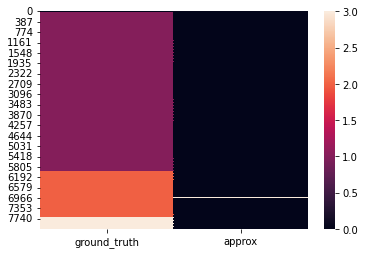

In [14]:
from sklearn.cluster import KMeans
import seaborn as sns
km = KMeans(n_clusters=4,random_state=818,n_init=1) 
km.fit(X)
plotComparison(km.labels_, Y)

Without the need to invest much more time, the algorithm is not successful in defining different clusters for our data. We will check two more algorithms to find out if the problem is in the calculations done, on in the data themselves.

Let's try another one.


### Agglomerative Clustering

In this case, clusters start from the X node pairs which are closest with one another, and then grow and merge organically. We need to specify number of clusters and the definition of the distance metrics. In this case I have chosen 'ward' because it offers an advantage tradeout between single and complete linkage.

If we run it:

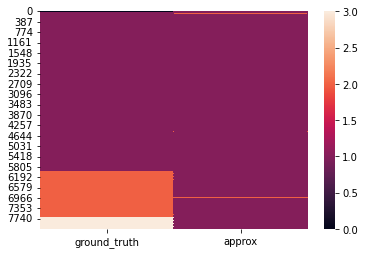

In [15]:
from sklearn.cluster import  AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg = agg.fit(X)
plotComparison(agg.labels_, Y)

Again we get almost all of the data points as belonging to one single cluster. The two methods we have used do not show any underlying structure in the data which we can correlate to the ground truth.
Let's inspect a bit closed what is happening in the algorithm. As mentioned, they grow organically until they merge into 4 clusters. Let's stop the process when there are 10 of these clusters:

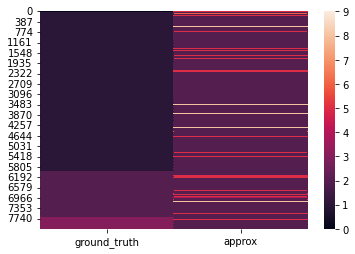

In [16]:
agg = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
agg = agg.fit(X)
plotComparison(agg.labels_, Y)

Although almost 6000 of the towns are claimed by a single party, our algorithm places them randomly across a variety of cluster. Assignation looks rather random.

### DBSCAN algorithm

Let's make a third and final attempt with the DBSCAN algorithm.

I found out that one of the difficulties is choosing right the hiper parameters epsilon. At first I chose an arbitrary eps of (25), however this did not yield any result, since most of my data points were classified as -1. This means that they were considered outliers, as the radium of the hyperspheres was too little.

This is what happened:

labels
-1        7509
 1         278
 2         129
 3          41
 5          22
 6          21
 7          18
 11          7
 16          7
 15          7
 13          7
 25          7
 4           7
 12          5
 9           5
 20          5
 10          4
 0           4
 14          4
 8           4
 17          4
 18          4
 19          4
 21          4
 22          4
 23          4
 24          4
dtype: int64

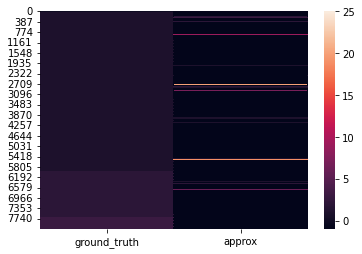

In [28]:
from sklearn.cluster import DBSCAN

unicoDF = pd.DataFrame()
summary = pd.DataFrame()

eps = 25

DBcluster = DBSCAN(eps=eps, min_samples=4)
DBcluster.fit(X)

plotComparison(DBcluster.labels_, Y)
#np.unique(DBcluster.labels_, return_counts=True)

testDBSCAN50 = pd.DataFrame({"labels": DBcluster.labels_})
testDBSCAN50.value_counts().sort_values(ascending= False)


Unfortunately, the radium of the hypersphere it not intuitive. 

In order to solve this problem, I created a function to test multiple variations of epsilon. It will place the labels in a dedicated dataframe.

In [30]:
from sklearn.cluster import DBSCAN

unicoDF = pd.DataFrame()
summary = pd.DataFrame(index=[-1, 0, 1, 2, 3, 4])

def proportionCluster(eps):
    DBcluster = DBSCAN(eps=eps, min_samples=4)
    DBcluster.fit(X)
    label  = 'datos ' + str(eps)
    unicoDF[label] = DBcluster.labels_
    summary[label] = unicoDF[label].value_counts()


In [34]:


listTest = [5, 10, 25, 50, 100, 250, 500, 1000, 2500, 5000]

#t = unicoDF['datos 5000'].value_counts()
#summary['datos 5000'] = t
for x in listTest:
    proportionCluster(x)

summary

,datos 5,datos 10,datos 25,datos 50,datos 100,datos 250,datos 500,datos 1000,datos 2500,datos 5000
-1,8119.0,8119.0,7509,2974,1635,857,515,288,153.0,81.0
0,NaN,NaN,4,4379,6137,7156,7513,7762,7958.0,8013.0
1,NaN,NaN,278,7,162,7,5,11,3.0,18.0
2,NaN,NaN,129,443,6,5,4,16,5.0,5.0
3,NaN,NaN,41,25,15,42,10,14,NaN,2.0
4,NaN,NaN,7,12,4,8,17,5,NaN,NaN


Already from this perspective we can see that, as the clustering algorithm evolves, cluster 0 gets the vast majority of the non-outlier points. (e.g. eps = 1000, cluster 0 accounts for 99.4% of the clustered points)
This is not consistent with our dataset, where the bigger cluster is about 5800 data points. Anyway, let's plot it as usual:

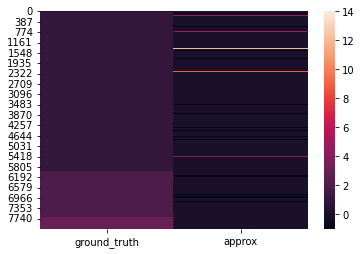

In [42]:
eps = 500

DBcluster = DBSCAN(eps=eps, min_samples=4)
DBcluster.fit(X)

plotComparison(DBcluster.labels_, Y)

## Recommendation of model

Unfortunately, this time the analysis has not provided any useful results. 

I have tested three methods, however all of them failed at the task of separating the data into structures. All of them have established that the data fit into one single cluster. If we force them to identify more clusters, then spontaneously some random points start to fall apart. But they are definitely not showing separate structures.

As all of them express the same result, I tend to think that the problem is simply on the data. The datapoints seem to be too close to one another or even mixed up in the space. Therefore any distance-based method attempting to separate them is bound to fail. 
 



## Summary Key Findings and Insights

After some reflection, I have come to the conclusion that this exercise was ill-conditioned. I find this failure very instructive and I have taken lessons learnt which I will try to explain now.

In principle, clustering should allow to find structures within our dataset. In order for this to be feasible, there needs to be some 'natural centroid' where data gather around. The purpose of the exercise is then to get the right number of centroids (clusters) and locate them correctly. 
Some examples used by the instructors were the preferences of groups of customers for a given company. So we can maybe we can then find common features across customers likely to churn, or identify premium customers based on their preferences.

But if you look at my dataset X, it shows a variety of circumstances which are naturally given data. For example, a given town may have an unemployment rate ranging from 10 to 30%, or average age ranging from 15 to 65). These are circumstances that come as they are. People (and towns) don't have any decision on them. 
Moreover we can expect them to fill out completely the feature space without separation between them: It intuitively makes no sense expecting to find a natural gathering at a given unemployment rate or average age. Therefore attempting to group the features in groups is necessarily going to fail.

I did not realize this at first because I was distracted with the label Y (political party that was chosen), and I was hoping to have the features data reflect that very reality. But, even if those factors may affect the final political choice -and this would be a classification problem-, we cannot expect the differences in voting preferences to be reflected in the demographic statistics.

## Suggestions for next steps (Lessons learnt)

As mentioned, this exercise failed at its target, so rather than suggestions for next steps, my takeaway is a lesson learnt.

We should inspect, in a way as intuitive as possible, if the target that we want to achieve makes sense. If this is not logical, any subsequent effort will fail or lead us to inconsistent results.
My suggestion for a next study would be to ensure that there is some sort of a "natural centroid" where data can be gathered around. That is, imagine a valid solution and reflect if it really makes sense.

If I was to make the exercise again, I would probably look at a different dataset.